In [98]:
import pandas as pd
import numpy as np
import scipy as sts
import matplotlib.pyplot as plt
import os
import csv

In [4]:
arrest19 = "Data/IL2019/NIBRS_ARRESTEE.csv"
arrest_df19 = pd.read_csv(arrest19)
incident19 = "Data/IL2019/NIBRS_incident.csv"
incident_df19 = pd.read_csv(incident19)
merged2019 = pd.merge(incident_df19, arrest_df19, on="INCIDENT_ID")

arrest09 = "Data/IL2009/nibrs_arrestee.csv"
arrest_df09 = pd.read_csv(arrest09)
incident09 = "Data/IL2009/nibrs_incident.csv"
incident_df09 = pd.read_csv(incident09)
merged2009 = pd.merge(incident_df09, arrest_df09, on="incident_id")

violent = "Data/IL2019/NIBRS_OFFENSE_TYPE.csv"
violent_df = pd.read_csv(violent)

In [5]:
clean2019 = merged2019.drop(columns = ['DATA_YEAR_x',
 'AGENCY_ID',
 'INCIDENT_ID',
 'NIBRS_MONTH_ID',
 'CARGO_THEFT_FLAG',
 'SUBMISSION_DATE','REPORT_DATE_FLAG', 'CLEARED_EXCEPT_DATE',
 'INCIDENT_STATUS','DATA_HOME',
 'ORIG_FORMAT','DATA_YEAR_y',
 'ARRESTEE_ID', 'ARRESTEE_SEQ_NUM', 'AGE_ID','UNDER_18_DISPOSITION_CODE',
 'CLEARANCE_IND',
 'AGE_RANGE_LOW_NUM',
 'AGE_RANGE_HIGH_NUM', 'DID'])



clean2009 = merged2009.drop(columns = [
 'agency_id',
 'incident_id',
 'nibrs_month_id',
 'cargo_theft_flag',
 'submission_date','report_date_flag', 'cleared_except_date',
 'incident_status','data_home',
 'orig_format',
 'arrestee_id', 'arrestee_seq_num', 'age_id','under_18_disposition_code',
 'clearance_ind',
 'age_range_low_num',
 'age_range_high_num', 'incident_number','ddocname', 'ff_line_number_x','did', 'arrest_num', 'ff_line_number_y'])


In [6]:
list(clean2009.columns.values)

['incident_date',
 'incident_hour',
 'cleared_except_id',
 'arrest_date',
 'arrest_type_id',
 'multiple_indicator',
 'offense_type_id',
 'age_num',
 'sex_code',
 'race_id',
 'ethnicity_id',
 'resident_code']

In [7]:
clean2009

,incident_date,incident_hour,cleared_except_id,arrest_date,arrest_type_id,multiple_indicator,offense_type_id,age_num,sex_code,race_id,ethnicity_id,resident_code
0,2009-01-01 00:00:00,10,6,2009-02-25 00:00:00,3,N,51,43.0,M,2,2,R
1,2009-01-01 00:00:00,1,6,2009-01-01 00:00:00,1,N,51,25.0,M,2,2,R
2,2009-01-01 00:00:00,13,6,2009-03-13 00:00:00,3,N,56,32.0,M,2,2,R
3,2009-01-01 00:00:00,19,6,2009-01-01 00:00:00,1,N,51,41.0,F,2,2,R
4,2009-01-01 00:00:00,1,6,2009-01-01 00:00:00,3,N,51,24.0,F,2,2,R
...,...,...,...,...,...,...,...,...,...,...,...,...
5281,2009-12-06 00:00:00,21,6,2009-12-06 00:00:00,1,N,35,51.0,F,2,2,R
5282,2009-12-06 00:00:00,22,6,2009-12-06 00:00:00,1,N,49,40.0,M,2,2,R
5283,2009-12-07 00:00:00,5,6,2009-12-07 00:00:00,1,N,45,55.0,M,2,2,R
5284,2009-12-07 00:00:00,4,6,2009-12-07 00:00:00,1,N,49,17.0,M,2,2,R


In [8]:
clean2019

,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE
0,08-NOV-19,7,6,14-NOV-19,3,N,29,56,M,2,2,R
1,08-NOV-19,21,6,16-DEC-19,3,N,5,24,M,2,2,R
2,08-NOV-19,20,6,16-DEC-19,3,N,51,24,M,2,2,R
3,17-OCT-19,22,6,30-DEC-19,3,N,27,20,M,2,2,R
4,01-DEC-19,18,6,01-DEC-19,1,N,2,15,F,2,2,R
...,...,...,...,...,...,...,...,...,...,...,...,...
4135,01-DEC-19,17,6,03-DEC-19,3,N,40,23,M,2,2,R
4136,01-DEC-19,18,6,01-DEC-19,1,N,51,37,M,2,2,R
4137,01-DEC-19,22,6,01-DEC-19,1,N,27,22,M,1,1,R
4138,03-FEB-19,17,6,21-JAN-20,1,N,48,58,M,2,2,R


In [60]:
underage2009 = clean2009[clean2009.age_num <= 25]
underage2019 = clean2019[clean2019.AGE_NUM <= 25]



In [61]:
totalunder25crimes2009 = underage2009['incident_date'].count()
totalunder25crimes2019 = underage2019['INCIDENT_DATE'].count()

In [62]:
gendercount2009 = underage2009.groupby("sex_code")["incident_date"].count()
gendercount2019 = underage2019.groupby("SEX_CODE")["INCIDENT_DATE"].count()

In [63]:
femalecount2009 = gendercount2009[0]
malecount2009 = gendercount2009[1]
percentfemale2009 = femalecount2009/totalunder25crimes2009 * 100
percentmale2009 = malecount2009/totalunder25crimes2009 * 100
percentfemale2009 = percentfemale2009.round(2)
percentmale2009 = percentmale2009.round(2)

femalecount2019 = gendercount2019[0]
malecount2019 = gendercount2019[1]
percentfemale2019 = femalecount2019/totalunder25crimes2019 * 100
percentmale2019 = malecount2019/totalunder25crimes2019 * 100
percentfemale2019 = percentfemale2019.round(2)
percentmale2019 = percentmale2019.round(2)

In [64]:
groupcrime2009 = underage2009.groupby(["multiple_indicator", "sex_code"])["incident_date"].count()
groupcrime2019 = underage2019.groupby(["MULTIPLE_INDICATOR", "SEX_CODE"])["INCIDENT_DATE"].count()

In [65]:
solocrimecount2009 = groupcrime2009[3] + groupcrime2009[4]
groupcrimecount2009 = groupcrime2009[0] + groupcrime2009[1] + groupcrime2009[2]
percentsolocrime2009 = solocrimecount2009/totalunder25crimes2009 * 100
percentgroupcrime2009 = groupcrimecount2009/totalunder25crimes2009 * 100
percentsolocrime2009 = percentsolocrime2009.round(2)
percentgroupcrime2009 = percentgroupcrime2009.round(2)

solocrimecount2019 = groupcrime2019[3] + groupcrime2019[4]
groupcrimecount2019 = groupcrime2019[0] + groupcrime2019[1] + groupcrime2019[2]
percentsolocrime2019 = solocrimecount2019/totalunder25crimes2019 * 100
percentgroupcrime2019 = groupcrimecount2019/totalunder25crimes2019 * 100
percentsolocrime2019 = percentsolocrime2019.round(2)
percentgroupcrime2019 = percentgroupcrime2019.round(2)

In [66]:
arresttype2009 = underage2009.groupby(["arrest_type_id", "sex_code"])["incident_date"].count()
arresttype2019 = underage2019.groupby(["ARREST_TYPE_ID", "SEX_CODE"])["INCIDENT_DATE"].count()

In [69]:
femalejail2009 = arresttype2009[3][0]
malejail2009 = arresttype2009[3][1]
percentfemalejail2009 = femalejail2009/femalecount2009 * 100
percentmalejail2009 = malejail2009/malecount2009 * 100
percentfemalejail2009 = percentfemalejail2009.round(2)
percentmalejail2009 = percentmalejail2009.round(2)

femalejail2019 = arresttype2019[3][0]
malejail2019 = arresttype2019[3][1]
percentfemalejail2019 = femalejail2019/femalecount2019 * 100
percentmalejail2019 = malejail2019/malecount2019 * 100
percentfemalejail2019 = percentfemalejail2019.round(2)
percentmalejail2019 = percentmalejail2019.round(2)

In [70]:
underagejail2009 = underage2009[underage2009.arrest_type_id == 3]
underagejail2019 = underage2019[underage2019.ARREST_TYPE_ID == 3]

In [71]:
underagejailresident2009 = underagejail2009.groupby(["sex_code", "resident_code"])["incident_date"].count()
underagejailresident2019 = underagejail2019.groupby(["SEX_CODE", "RESIDENT_CODE"])["INCIDENT_DATE"].count()

In [48]:
violentcrimesid = violent_df[violent_df.VIOLENT_CRIME == 'Y']
listofviolentcrimeid = list(violentcrimesid['OFFENSE_TYPE_ID'])

In [72]:
listofviolentcrimeid

[58,
 1,
 3,
 4,
 5,
 7,
 8,
 13,
 14,
 15,
 18,
 20,
 21,
 23,
 26,
 27,
 28,
 29,
 30,
 32,
 38,
 39,
 40,
 43,
 44,
 45,
 47,
 49,
 55,
 59,
 60,
 62,
 69,
 70,
 80,
 81,
 86,
 51,
 56,
 36]

In [89]:
jailviolent2009 = underagejail2009[underagejail2009.offense_type_id.isin(listofviolentcrimeid)]
jailviolent2019 = underagejail2019[underagejail2019.OFFENSE_TYPE_ID.isin(listofviolentcrimeid)]

In [90]:
jailviolentgendercount2009 = jailviolent2009.groupby("sex_code")["incident_date"].count()
jailviolentgendercount2019 = jailviolent2019.groupby("SEX_CODE")["INCIDENT_DATE"].count()

In [94]:
menjailviolent2009 = jailviolentgendercount2009[0]
womenjailviolent2009 = jailviolentgendercount2009[1]

menjailviolent2019 = jailviolentgendercount2019[0]
womenjailviolent2019 = jailviolentgendercount2019[1]

menjailnonviolent2009 = malejail2009 - menjailviolent2009
womenjailnonviolent2009 = malejail2009 - menjailviolent2009

menjailnonviolent2019 = malejail2019 - menjailviolent2019
womenjailnonviolent2019 = malejail2019 - menjailviolent2019

([<matplotlib.patches.Wedge at 0x7fe0a8279580>,
 [Text(-1.1870063950006744, -0.1761130836352109, 'Women in Jail for Non-Violent Crimes'),
  Text(0.48403999157455485, -0.9877779540749556, 'Women in Jail for Violent Crimes'),
  Text(0.7942930962708735, 0.7609852017065963, 'Men in Jail for Non-Violent Crimes'),
  Text(-0.48404008405699817, 0.987777908755857, 'Men in Jail for Violent Crimes')],
 [Text(-0.6924203970837267, -0.10273263212053967, '26.9%'),
  Text(0.2640218135861208, -0.5387879749499758, '32.9%'),
  Text(0.4332507797841128, 0.41508283729450707, '26.9%'),
  Text(-0.26402186403108985, 0.5387879502304674, '13.3%')])

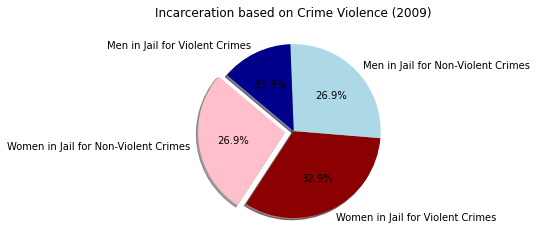

In [105]:
labels = ["Women in Jail for Non-Violent Crimes", "Women in Jail for Violent Crimes", "Men in Jail for Non-Violent Crimes", "Men in Jail for Violent Crimes"]
values = [womenjailnonviolent2009, womenjailviolent2009, menjailnonviolent2009, menjailviolent2009]
colors = ["pink", "darkred", "lightblue", "darkblue"]
explode = (0.1, 0, 0, 0)


plt.title("Incarceration based on Crime Violence (2009)")
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct= "%1.1f%%", shadow= True, startangle=140)


([<matplotlib.patches.Wedge at 0x7fe0ca40fc40>,
 [Text(-1.1369092049082898, -0.3839758583489332, 'Women in Jail for Non-Violent Crimes'),
  Text(0.7227953156045182, -0.8291965579644945, 'Women in Jail for Violent Crimes'),
  Text(0.49091357665744534, 0.9843799369417251, 'Men in Jail for Non-Violent Crimes'),
  Text(-0.7227952282651561, 0.8291966340965943, 'Men in Jail for Violent Crimes')],
 [Text(-0.6631970361965024, -0.223985917370211, '32.6%'),
  Text(0.3942519903297372, -0.45228903161699696, '29.9%'),
  Text(0.267771041813152, 0.5369345110591227, '32.6%'),
  Text(-0.39425194269008507, 0.45228907314359684, '5.0%')])

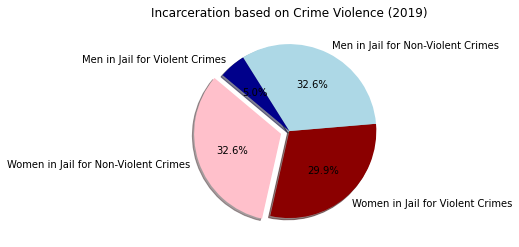

In [107]:
labels = ["Women in Jail for Non-Violent Crimes", "Women in Jail for Violent Crimes", "Men in Jail for Non-Violent Crimes", "Men in Jail for Violent Crimes"]
values = [womenjailnonviolent2019, womenjailviolent2019, menjailnonviolent2019, menjailviolent2019]
colors = ["pink", "darkred", "lightblue", "darkblue"]
explode = (0.1, 0, 0, 0)


plt.title("Incarceration based on Crime Violence (2019)")
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct= "%1.1f%%", shadow= True, startangle=140)



<AxesSubplot:title={'center':'Arrested Under 25 (2009)'}, xlabel='Gender'>

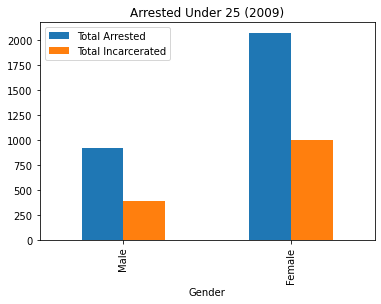

In [114]:


plotdf = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Total Arrested': [femalecount2009, malecount2009],
    'Total Incarcerated': [femalejail2009, malejail2009]
})


plotdf.plot(x="Gender", y=["Total Arrested", "Total Incarcerated"], kind="bar", title = "Arrested Under 25 (2009)")

<AxesSubplot:title={'center':'Arrested Under 25 (2019)'}, xlabel='Gender'>

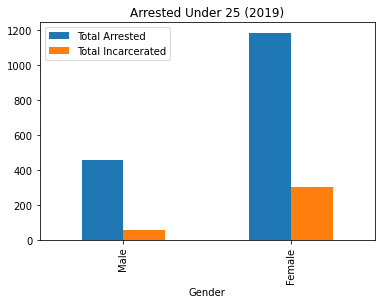

In [115]:


plotdf = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Total Arrested': [femalecount2019, malecount2019],
    'Total Incarcerated': [femalejail2019, malejail2019]
})


plotdf.plot(x="Gender", y=["Total Arrested", "Total Incarcerated"], kind="bar", title = "Arrested Under 25 (2019)")